In [1]:
import bfgs
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def function(x):
    return 100.0 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [8]:
wrapped_fn = bfgs.Wrapper(function)
x_min = bfgs.minimize(wrapped_fn, np.array([15.0,15.0]), 1e-3, 500, verbose=False)
f_values = bfgs.get_function_vals(wrapped_fn)
x_values = bfgs.get_x_vals(wrapped_fn)

Optimal value of 0.000 found, termination at specified convergence of 0.001


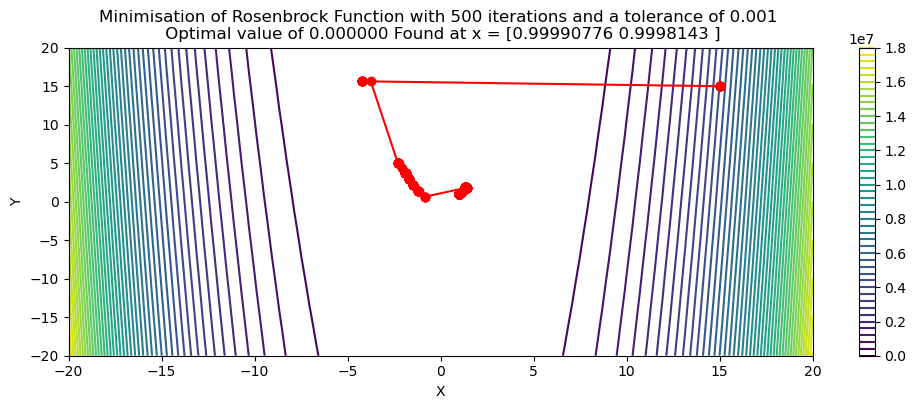

In [11]:
from mpl_toolkits.mplot3d import Axes3D
lim = 20
plotlim=20
# Create a meshgrid for the surface plot
x = np.linspace(-plotlim, plotlim, 100)
y = np.linspace(-plotlim, plotlim, 100)
x, y = np.meshgrid(x, y)
z = function([x, y, np.zeros_like(x)])

contour = plt.contour(x, y, z, 50, cmap='viridis')
plt.colorbar(contour)
plt.plot(x_values[:, 0], x_values[:, 1], color='r', marker='o')
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Minimisation of Rosenbrock Function with 500 iterations and a tolerance of 0.001 \n Optimal value of {function(x_values[-1]):2f} Found at x = {x_values[-1]}')

plt.gcf().set_size_inches(12, 4)
plt.show()
